## Task 1 

* For each dataset two clustering Approaches, KMeans, Heirarchical Clustering have been used to generate the clusters.
* As each of the datasets are povided with the truth labels a 3d/2d scatter plot for the original classes, The predicted clusters using Kmeans and Heirarchical Clustering
* For each cluster formed using Heirarchical clustering there are dendograms plotted 
* To evaluate the quality of clusters used external validation metrics are used
* The external validation metrics used are Accuracy,F1 Score ,Rand Index,Adj Rand Index, Homogeneity,Completeness Scores 

#### The equations for the external validation metrics are as follows
#### Accuracy 
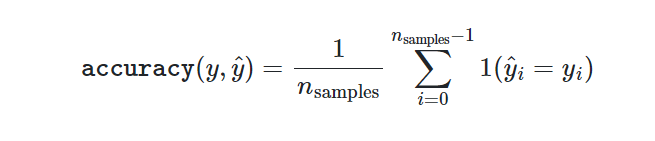


##### F1 Score For Binary Classes
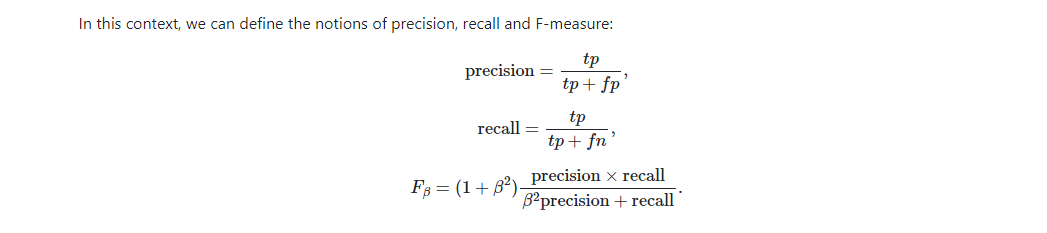

#### Rand Index, Unadjusted,Adjusted

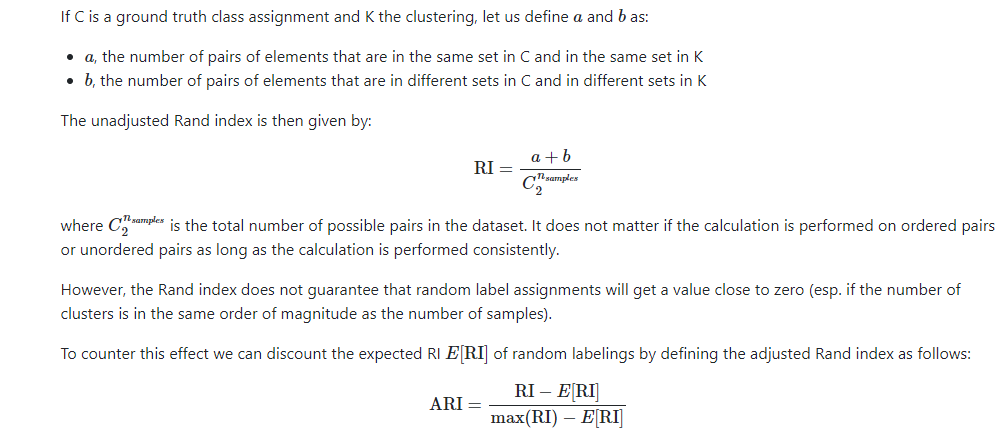

#### Homogeneity , Completeness Scores
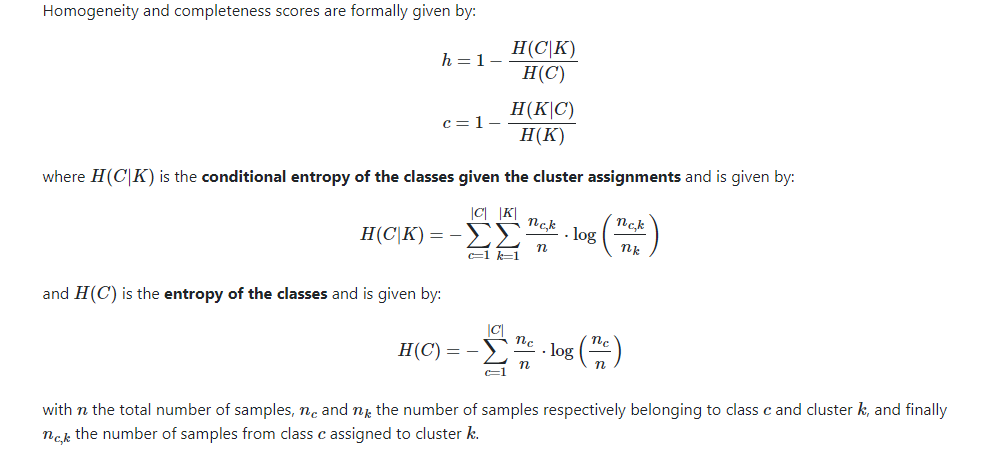

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None) #to display all rows in data frames by default

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv


In [ ]:
df_1 = pd.read_csv('/Data1.csv')

In [ ]:
#df_1 = pd.read_csv("./Data/Task1/Data1.csv") # Reading the Data1 data set

#### There are three features in the dataset

In [ ]:
df_1.head()

Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1

In [ ]:
df_1.drop('Unnamed: 0',axis = 1,inplace = True) # to drop the Unnamed:0 Column which is index of the data

#### The scale of the features are similar

In [ ]:
df_1.describe() #to summarize the central tendency, dispersion and shape of dataset’s distribution

X1          X2          X3       Class
count  212.000000  212.000000  212.000000  212.000000
mean     0.015418    0.034183   -0.035626    3.971698
std      1.647716    1.670505    1.628822    2.016320
min     -3.970394   -3.881493   -3.909294    1.000000
25%     -0.407496   -0.476732   -0.423145    2.000000
50%     -0.003762   -0.004597    0.021322    4.000000
75%      0.438729    0.500722    0.384359    6.000000
max      3.747710    3.774495    3.899389    7.000000

#### The three features are in similar scale

In [ ]:
df_1.head()

X1        X2        X3  Class
0 -0.063274  0.027734  0.022683      1
1 -0.000731  0.048211  0.069198      1
2 -0.060767 -0.009080  0.053085      1
3  0.013252 -0.011876  0.055324      1
4 -0.054508 -0.003813  0.001738      1

#### There are 7 classes in the dataset

In [ ]:
df_1['Class'].value_counts().sort_values(ascending = False)  # Counting the No of Classification Classes in the dataset

1    32
2    30
3    30
4    30
5    30
6    30
7    30
Name: Class, dtype: int64

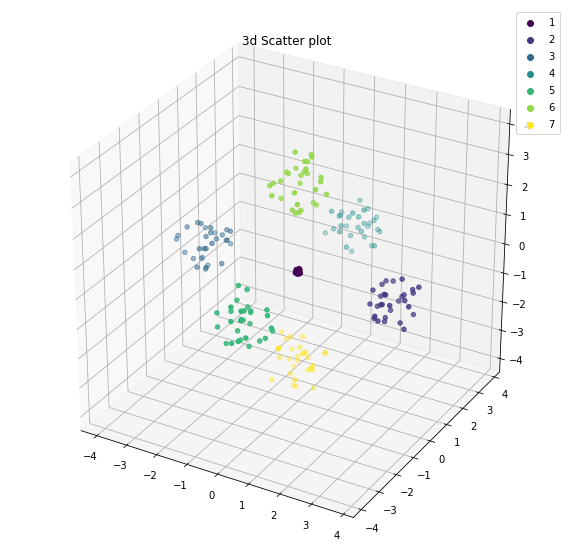

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_1['X1'], df_1['X2'], df_1['X3'],c=df_1['Class'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

#### Generating Clusters

In [ ]:
# Generating the Clusters using Kmeans
from sklearn.cluster import KMeans
cluster_data_1 = KMeans(n_clusters = 7)
cluster_data_1.fit(df_1.iloc[:,0:3])

KMeans(n_clusters=7)

In [ ]:
cluster_data_1.labels_ #classification generated using Kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
# saving column with the predicted classification in the data frame 
df_1['Predict_label_Kmeans'] = cluster_data_1.labels_

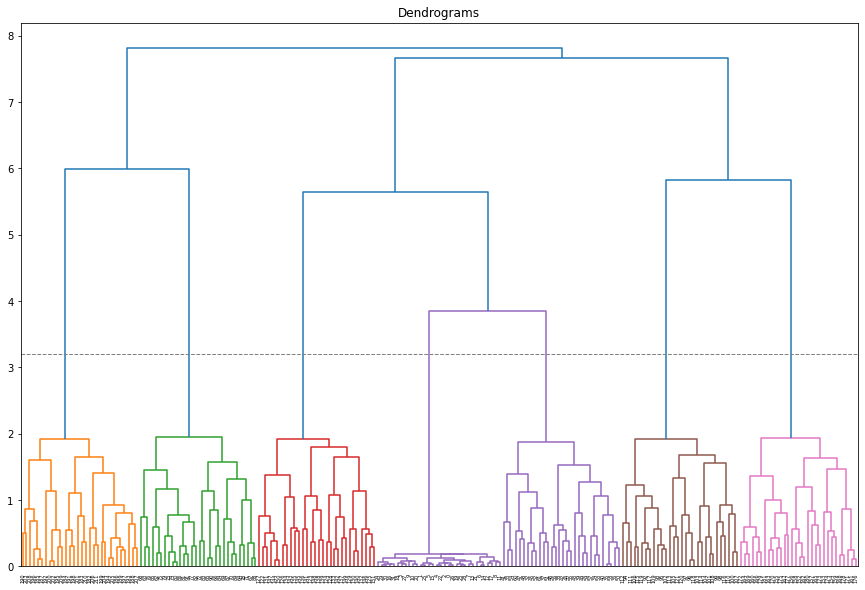

In [ ]:
# Generating a dendogram for hierarichal classification
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (15, 10))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_1.iloc[:,:3], method = 'complete',))
plt.axhline(y = 3.2, c = 'grey', lw = 1, linestyle = 'dashed')

In [ ]:
# Generating Cluster labels through heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')  
cluster.fit_predict(df_1.iloc[:,:3])

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
df_1['Predict_label_heirarchical'] = cluster.labels_ #adding generated classification to the data frame


In [ ]:
df_1.head()

X1        X2        X3  Class Predict_label_Kmeans  \
0 -0.063274  0.027734  0.022683      1                    1   
1 -0.000731  0.048211  0.069198      1                    1   
2 -0.060767 -0.009080  0.053085      1                    1   
3  0.013252 -0.011876  0.055324      1                    1   
4 -0.054508 -0.003813  0.001738      1                    1   

  Predict_label_heirarchical  
0                          6  
1                          6  
2                          6  
3                          6  
4                          6

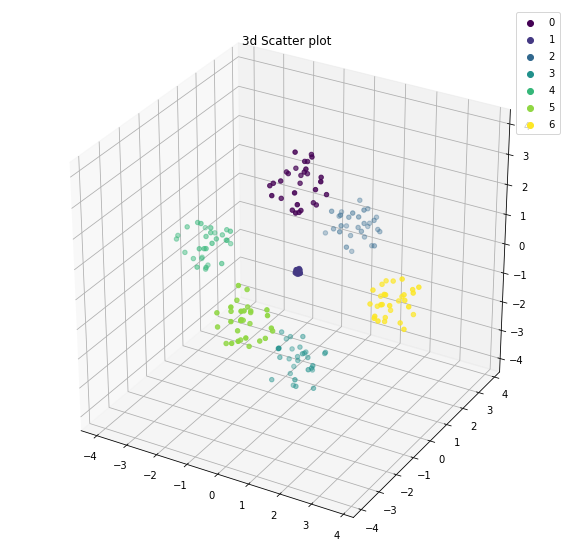

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_1['X1'], df_1['X2'], df_1['X3'],c=df_1['Predict_label_Kmeans'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

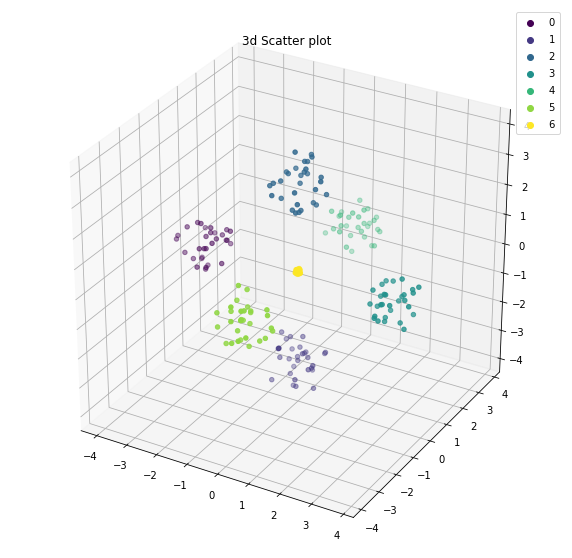

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_1['X1'], df_1['X2'], df_1['X3'],c=df_1['Predict_label_heirarchical'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
for i in df_1['Class'].unique(): #to check if classification can be mapped to predicted labels
    print("for Class =" + str(i))
    print(df_1[df_1['Class'] == i]['Predict_label_Kmeans'].value_counts())

for Class =1
1    32
Name: Predict_label_Kmeans, dtype: int64
for Class =2
6    30
Name: Predict_label_Kmeans, dtype: int64
for Class =3
4    30
Name: Predict_label_Kmeans, dtype: int64
for Class =4
2    30
Name: Predict_label_Kmeans, dtype: int64
for Class =5
5    30
Name: Predict_label_Kmeans, dtype: int64
for Class =6
0    30
Name: Predict_label_Kmeans, dtype: int64
for Class =7
3    30
Name: Predict_label_Kmeans, dtype: int64


In [ ]:
# replacing the cluster labels using the .replace method 
print("Accuracy Score for K means is : ",metrics.accuracy_score(df_1['Class'],df_1['Predict_label_Kmeans'].replace({'3':'2','5':'3','0':'4','4':'7','2':'5'})))
print("Accuracy Score for Heirarchical clustering is : ",metrics.accuracy_score(df_1['Class'],df_1['Predict_label_heirarchical']))

Accuracy Score for K means is :  0.29245283018867924
Accuracy Score for Heirarchical clustering is :  0.2830188679245283


In [ ]:
# replacing the cluster labels using the .replace method 
print("F1 Score for K means is  :",metrics.f1_score(df_1['Class'],df_1['Predict_label_Kmeans'].replace({'3':'2','5':'3','0':'4','4':'7','2':'5'}),average='weighted'))
print("F1 Score for heirarchical is  :",metrics.f1_score(df_1['Class'],df_1['Predict_label_heirarchical'],average='weighted'))

F1 Score for K means is  : 0.29245283018867924
F1 Score for heirarchical is  : 0.2830188679245283


* The intention Behind using external validation metrics with known labels is to understand how well the clustering algorithm is   performing against the known truth label
* Accuracy and F1 Score might not be the optimal metrics to measure the metrics as they are dependant on the labels themselves and adjusting the labels gives a different score each time
* The evaluation of this type of problem can be done using other metrics such as,Rand Index,Adjusted Rand Index,Homogeneity_score ,Completeness_Score among other metrics
* Homogeneity and Completeness are described as follows ,where "class" means the truth label 
* Homogeneity: each cluster contains only members of a single class.
* Completeness: all members of a given class are assigned to the same cluster.

### External metrics which don't consider the specific labels of the class for Kmeans

In [ ]:
# Rand Score
print("K_means Rand Score :",metrics.rand_score(df_1['Class'], df_1['Predict_label_Kmeans']))
# Adjusted Rand Score
print("K_means Adj Rand Score :",metrics.adjusted_rand_score(df_1['Class'], df_1['Predict_label_Kmeans']))
#Homogeneity Score
print("K_means homogeneity Score :",metrics.homogeneity_score(df_1['Class'], df_1['Predict_label_Kmeans']))
#Complteness Score 
print("K_menas Completeness Score : ",metrics.completeness_score(df_1['Class'], df_1['Predict_label_Kmeans']))

K_means Rand Score : 1.0
K_means Adj Rand Score : 1.0
K_means homogeneity Score : 1.0
K_menas Completeness Score :  1.0


### External metrics which don't consider the specific labels of the class for Heirarchical Clustering

In [ ]:
# Rand Score
print("Heirarchical Rand Score :",metrics.rand_score(df_1['Class'], df_1['Predict_label_heirarchical']))
# Adjusted Rand Score
print("Heirarchical Adj Rand Score :",metrics.adjusted_rand_score(df_1['Class'], df_1['Predict_label_heirarchical']))
#Homogeneity Score
print("Heirarchical  homogeneity Score :",metrics.homogeneity_score(df_1['Class'], df_1['Predict_label_heirarchical']))
#Complteness Score 
print("Heirarchical Completeness Score : ",metrics.completeness_score(df_1['Class'], df_1['Predict_label_heirarchical']))

Heirarchical Rand Score : 1.0
Heirarchical Adj Rand Score : 1.0
Heirarchical  homogeneity Score : 1.0000000000000002
Heirarchical Completeness Score :  1.0


* The homogeneity and completeness score state that
* Homogeneity that each cluster contains members of only one class
* Completeness score states that for each truth class all the members are present in the same predicted class

##### Kindly Note that the flow of code for the remaining datasets are the same 

#### Data 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data2.csv to Data2.csv


In [ ]:
df_2 = pd.read_csv('/Data2.csv')

In [ ]:
#df_2=pd.read_csv("./Data/Task1/Data2.csv") # Read dataframe

In [ ]:
df_2.head() #Seeing top 5 rows of dataframe

Unnamed: 0         X         Y         C  Class
0         X1  3.277701  0.814082  0.326574      1
1         X2  0.387577  0.176780  0.888046      1
2         X3  0.268546  0.582963  0.080981      1
3         X4  2.031145  0.244597  0.643921      1
4         X5  0.188677  0.461280  0.496633      1

In [ ]:
#dropping the Unnamed:0 Column
df_2.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_2.head()  

X         Y         C  Class
0  3.277701  0.814082  0.326574      1
1  0.387577  0.176780  0.888046      1
2  0.268546  0.582963  0.080981      1
3  2.031145  0.244597  0.643921      1
4  0.188677  0.461280  0.496633      1

In [ ]:
df_2['Class'].value_counts() #counting no. of elements in classification

1    200
2    100
3    100
4      4
Name: Class, dtype: int64

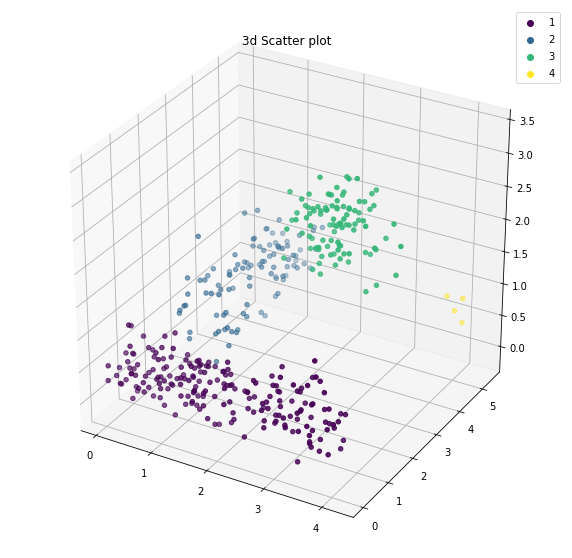

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_2['X'], df_2['Y'], df_2['C'],c=df_2['Class'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
# Within cluster evaluation
from sklearn.cluster import KMeans
cluster_data_2 = KMeans(n_clusters=4) #creating Kmeans clusters
cluster_data_2.fit(df_2.iloc[:,0:3])

KMeans(n_clusters=4)

In [ ]:
df_2['Predict_label_Kmeans'] = cluster_data_2.labels_ #saving kmeans clusters to data frame column


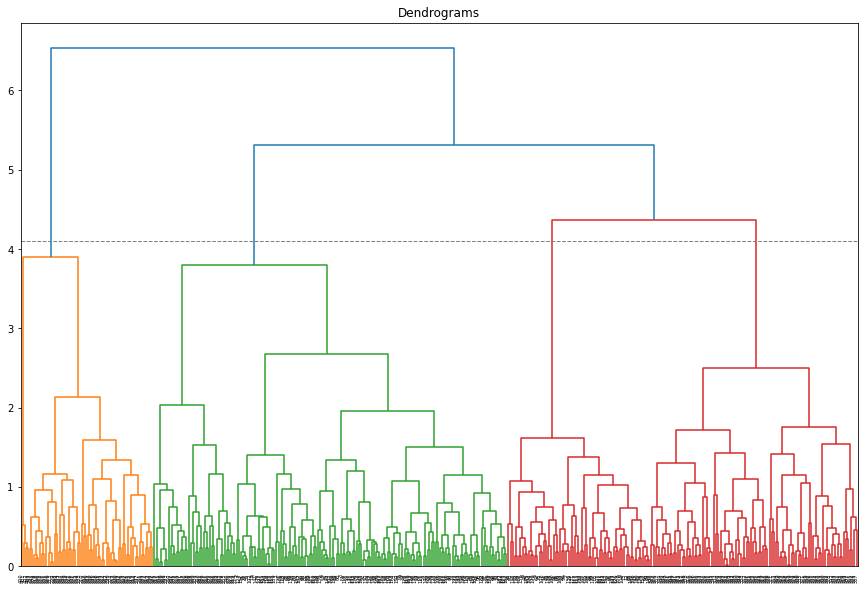

In [ ]:
import scipy.cluster.hierarchy as shc #creating dendograms for hierarical classification
plt.figure(figsize = (15, 10))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_2.iloc[:,:3], method='complete',))
plt.axhline(y = 4.1, c = 'grey', lw=1, linestyle = 'dashed')

In [ ]:
# Generating Cluster labels through heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster_2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
cluster_2.fit_predict(df_2.iloc[:,:3])

array([3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1,

In [ ]:
df_2['Predict_label_heirarchical'] = cluster_2.labels_ #to save generated classification in data frame

In [ ]:
df_2.head()

X         Y         C  Class  Predict_label_Kmeans  \
0  3.277701  0.814082  0.326574      1                     3   
1  0.387577  0.176780  0.888046      1                     0   
2  0.268546  0.582963  0.080981      1                     0   
3  2.031145  0.244597  0.643921      1                     3   
4  0.188677  0.461280  0.496633      1                     0   

   Predict_label_heirarchical  
0                           3  
1                           2  
2                           2  
3                           2  
4                           2

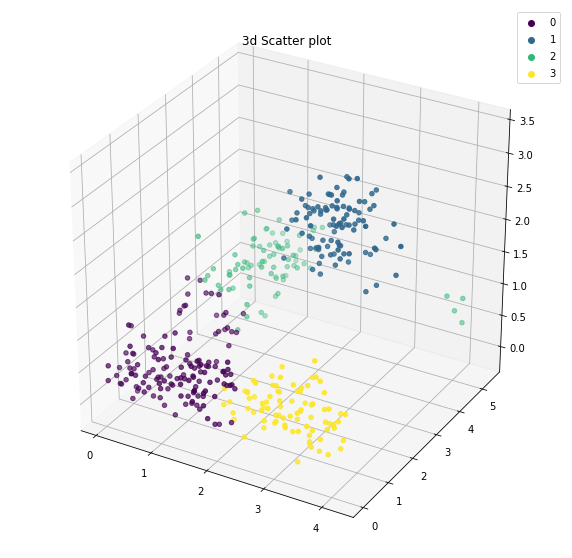

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_2['X'], df_2['Y'], df_2['C'],c=df_2['Predict_label_Kmeans'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

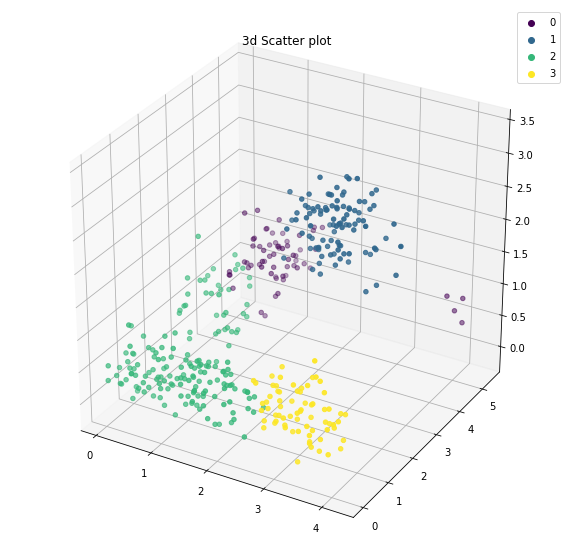

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_2['X'], df_2['Y'], df_2['C'],c=df_2['Predict_label_heirarchical'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
df_2["Kmeans_replaced"] = df_2['Predict_label_Kmeans'].astype(int)+1 #trying to map to find classification if they are similar
df_2['heirarchical_replaced'] = df_2['Predict_label_heirarchical'].astype(int)+1

In [ ]:
print("Accuracy Score for K means is : ",metrics.accuracy_score(df_2['Class'],df_2['Kmeans_replaced']))
print("Accuracy Score for Heirarchical clustering is : ",metrics.accuracy_score(df_2['Class'],df_2['heirarchical_replaced']))

Accuracy Score for K means is :  0.2896039603960396
Accuracy Score for Heirarchical clustering is :  0.0


In [ ]:
print("F1 Score for K means is  :",metrics.f1_score(df_2['Class'],df_2['Kmeans_replaced'],average='weighted'))
print("F1 Score for heirarchical is  :",metrics.f1_score(df_2['Class'],df_2['heirarchical_replaced'],average='weighted'))

F1 Score for K means is  : 0.33971139049388804
F1 Score for heirarchical is  : 0.0


* As we see replacing the labels gives a low Accuracy and F1 Score as the functions are dependant on the labels themselves 

In [ ]:
## Metrics for  Kmeans Clustering

# Rand Score
print("K_means Rand Score :",metrics.rand_score(df_2['Class'], df_2['Predict_label_Kmeans']))
# Adjusted Rand Score
print("K_means Adj Rand Score :",metrics.adjusted_rand_score(df_2['Class'], df_2['Predict_label_Kmeans']))
#Homogeneity Score
print("K_means homogeneity Score :",metrics.homogeneity_score(df_2['Class'], df_2['Predict_label_Kmeans']))
#Complteness Score 
print("K_menas Completeness Score : ",metrics.completeness_score(df_2['Class'], df_2['Predict_label_Kmeans']))

K_means Rand Score : 0.8200746873694814
K_means Adj Rand Score : 0.5877644016112638
K_means homogeneity Score : 0.817012481838807
K_menas Completeness Score :  0.6523688633135493


In [ ]:
## Metrics for Heirarchical Clustering


# Rand Score
print("Heirarchical Rand Score :",metrics.rand_score(df_2['Class'], df_2['Predict_label_heirarchical']))
# Adjusted Rand Score
print("Heirarchical Adj Rand Score :",metrics.adjusted_rand_score(df_2['Class'], df_2['Predict_label_heirarchical']))
#Homogeneity Score
print("Heirarchical  homogeneity Score :",metrics.homogeneity_score(df_2['Class'], df_2['Predict_label_heirarchical']))
#Complteness Score 
print("Heirarchical Completeness Score : ",metrics.completeness_score(df_2['Class'], df_2['Predict_label_heirarchical']))

Heirarchical Rand Score : 0.7921651966685502
Heirarchical Adj Rand Score : 0.5324992289812802
Heirarchical  homogeneity Score : 0.7536527908331135
Heirarchical Completeness Score :  0.6274314050080814


* The metrics which are not dependant on the labels as shown above shows us that Kmeans performed marginally better in terms of clustering the points according to the cluster labels

### Data 3

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
df_3 = pd.read_csv('/Data3.csv')

In [ ]:
#df_3=pd.read_csv("./Data/Task1/Data3.csv")

In [ ]:
df_3.head()

Unnamed: 0        X1        X2        X3  Class
0           1  1.295428  0.050829 -0.385217      1
1           2  1.409178 -0.035191 -0.251980      1
2           3  1.096803  0.246365 -0.415011      1
3           4  1.463328  0.265354 -0.513488      1
4           5  1.603284  0.080577 -0.470257      1

In [ ]:
#dropping the Unnamed:0 Column
df_3.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_3.head()

X1        X2        X3 Class
0  1.295428  0.050829 -0.385217     1
1  1.409178 -0.035191 -0.251980     1
2  1.096803  0.246365 -0.415011     1
3  1.463328  0.265354 -0.513488     1
4  1.603284  0.080577 -0.470257     1

In [ ]:
#No of data points in each CLassification
df_3['Class'].value_counts().sort_values(ascending=False)

1    100
2    100
3    100
4    100
Name: Class, dtype: int64

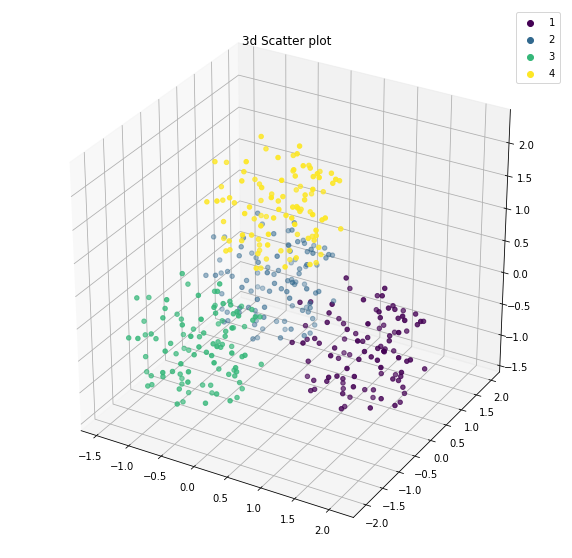

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_3['X1'], df_3['X2'], df_3['X3'],c=df_3['Class'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
# Within cluster evaluation
from sklearn.cluster import KMeans
cluster_data_3 = KMeans(n_clusters = 4)
cluster_data_3.fit(df_3.iloc[:,0:3]) #generating kmean clusters


KMeans(n_clusters=4)

In [ ]:
df_3['Predict_label_Kmeans'] = cluster_data_3.labels_ #saving kmeans classification in data frame


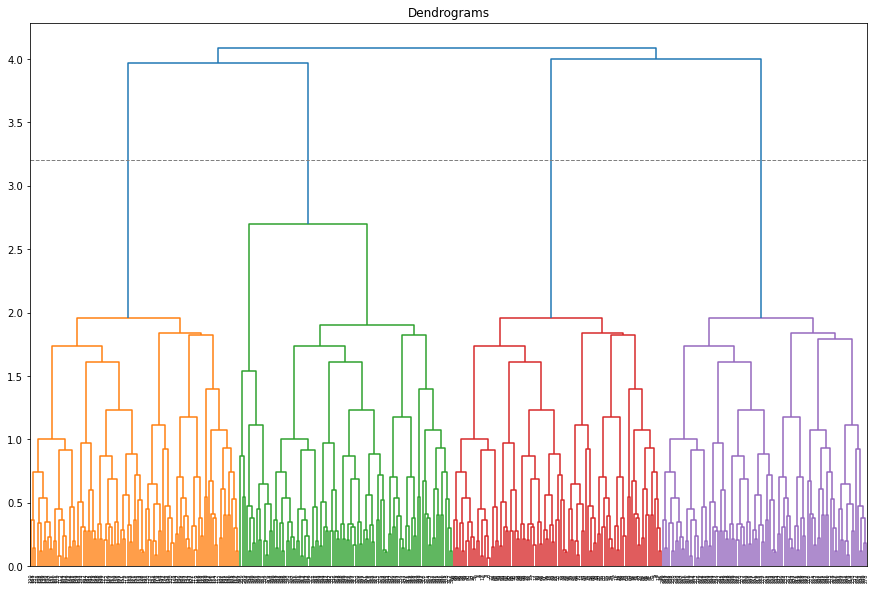

In [ ]:
import scipy.cluster.hierarchy as shc #creating dendograms for hierarical classification
plt.figure(figsize=(15, 10))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_3.iloc[:,:3], method = 'complete'))
plt.axhline(y=3.2, c='grey', lw = 1, linestyle = 'dashed')

In [ ]:
# Generating Cluster labels through heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster_3 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
cluster_3.fit_predict(df_3.iloc[:,:3])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [ ]:
df_3['Predict_label_heirarchical'] = cluster_3.labels_ #saving clusters in data frame

In [ ]:
df_3.head()

X1        X2        X3  Class  Predict_label_Kmeans  \
0  1.295428  0.050829 -0.385217      1                     1   
1  1.409178 -0.035191 -0.251980      1                     1   
2  1.096803  0.246365 -0.415011      1                     1   
3  1.463328  0.265354 -0.513488      1                     1   
4  1.603284  0.080577 -0.470257      1                     1   

   Predict_label_heirarchical  
0                           2  
1                           2  
2                           2  
3                           2  
4                           2

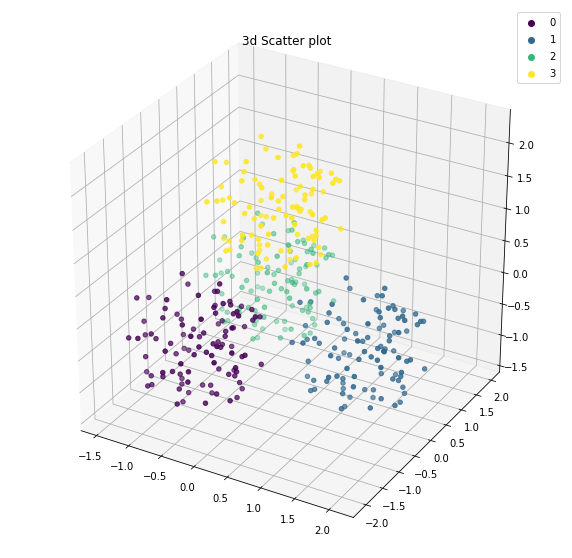

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_3['X1'], df_3['X2'], df_3['X3'],c=df_3['Predict_label_Kmeans'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

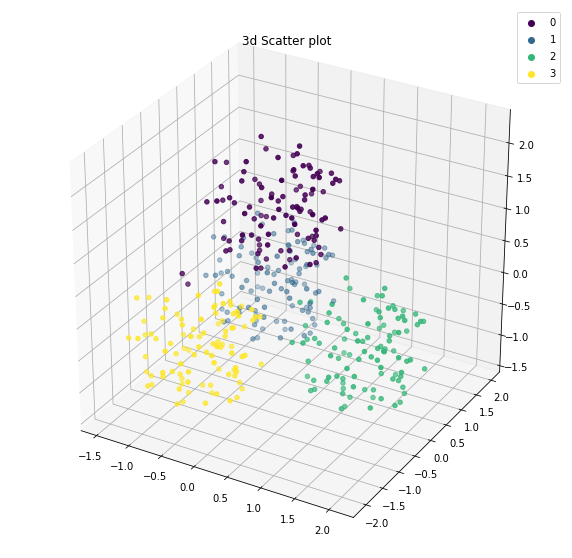

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_3['X1'], df_3['X2'], df_3['X3'],c=df_3['Predict_label_heirarchical'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
print("Accuracy Score for K means is : ",metrics.accuracy_score(df_3['Class'],df_3['Predict_label_Kmeans']))
print("Accuracy Score for Heirarchical clustering is : ",metrics.accuracy_score(df_3['Class'],df_3['Predict_label_heirarchical']))

Accuracy Score for K means is :  0.5
Accuracy Score for Heirarchical clustering is :  0.245


In [ ]:
print("F1 Score for K means is  :",metrics.f1_score(df_3['Class'],df_3['Predict_label_Kmeans'],average='weighted'))
print("F1 Score for heirarchical is  :",metrics.f1_score(df_3['Class'],df_3['Predict_label_heirarchical'],average='weighted'))

F1 Score for K means is  : 0.5
F1 Score for heirarchical is  : 0.2474747474747475


In [ ]:
## Metrics for  Kmeans Clustering

# Rand Score
print("K_means Rand Score :",metrics.rand_score(df_3['Class'], df_3['Predict_label_Kmeans']))
# Adjusted Rand Score
print("K_means Adj Rand Score :",metrics.adjusted_rand_score(df_3['Class'], df_3['Predict_label_Kmeans']))
#Homogeneity Score
print("K_means homogeneity Score :",metrics.homogeneity_score(df_3['Class'], df_3['Predict_label_Kmeans']))
#Complteness Score 
print("K_menas Completeness Score : ",metrics.completeness_score(df_3['Class'], df_3['Predict_label_Kmeans']))

K_means Rand Score : 1.0
K_means Adj Rand Score : 1.0
K_means homogeneity Score : 1.0
K_menas Completeness Score :  1.0


In [ ]:
## Metrics for Heirarchical Clustering


# Rand Score
print("Heirarchical Rand Score :",metrics.rand_score(df_3['Class'], df_3['Predict_label_heirarchical']))
# Adjusted Rand Score
print("Heirarchical Adj Rand Score :",metrics.adjusted_rand_score(df_3['Class'], df_3['Predict_label_heirarchical']))
#Homogeneity Score
print("Heirarchical  homogeneity Score :",metrics.homogeneity_score(df_3['Class'], df_3['Predict_label_heirarchical']))
#Complteness Score 
print("Heirarchical Completeness Score : ",metrics.completeness_score(df_3['Class'], df_3['Predict_label_heirarchical']))

Heirarchical Rand Score : 0.9950375939849624
Heirarchical Adj Rand Score : 0.9867009000400982
Heirarchical  homogeneity Score : 0.9822477926204751
Heirarchical Completeness Score :  0.9823186566579116


### Data 4

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data4.csv to Data4.csv


In [ ]:
df_4 = pd.read_csv('/Data4.csv')

In [ ]:
df_4.head()

Unnamed: 0      X1     X2       X3  Class
0           1 -0.4530 -0.891  0.02300      1
1           2  0.6530 -0.846  0.02110      1
2           3  0.3980  0.913 -0.00139      1
3           4  0.0952  1.050  0.00628      1
4           5  0.5240 -0.941  0.03780      1

In [ ]:
#df_4=pd.read_csv("./Data/Task1/Data4.csv")

In [ ]:
df_4.drop('Unnamed: 0',axis=1,inplace=True) #to drop index column


In [ ]:
df_4.head()

X1     X2       X3  Class
0 -0.4530 -0.891  0.02300      1
1  0.6530 -0.846  0.02110      1
2  0.3980  0.913 -0.00139      1
3  0.0952  1.050  0.00628      1
4  0.5240 -0.941  0.03780      1

In [ ]:
df_4['Class'].value_counts().sort_values(ascending=False) #find no. of values per classification

1    500
2    500
Name: Class, dtype: int64

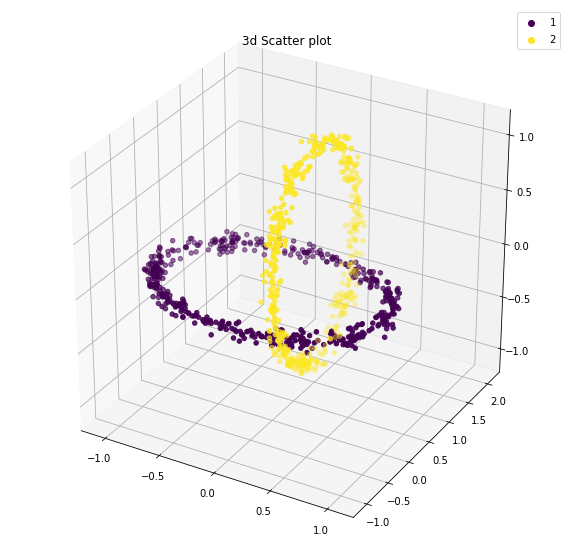

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_4['X1'], df_4['X2'], df_4['X3'],c=df_4['Class'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
#to create Kmeans clusters
from sklearn.cluster import KMeans
cluster_data_4 = KMeans(n_clusters=2)
cluster_data_4.fit(df_4.iloc[:,0:3])

KMeans(n_clusters=2)

In [ ]:
df_4['Predict_label_Kmeans'] = cluster_data_4.labels_ #to save kmeans classification to data frame

In [ ]:
df_4.head()

X1     X2       X3  Class  Predict_label_Kmeans
0 -0.4530 -0.891  0.02300      1                     1
1  0.6530 -0.846  0.02110      1                     1
2  0.3980  0.913 -0.00139      1                     0
3  0.0952  1.050  0.00628      1                     0
4  0.5240 -0.941  0.03780      1                     1

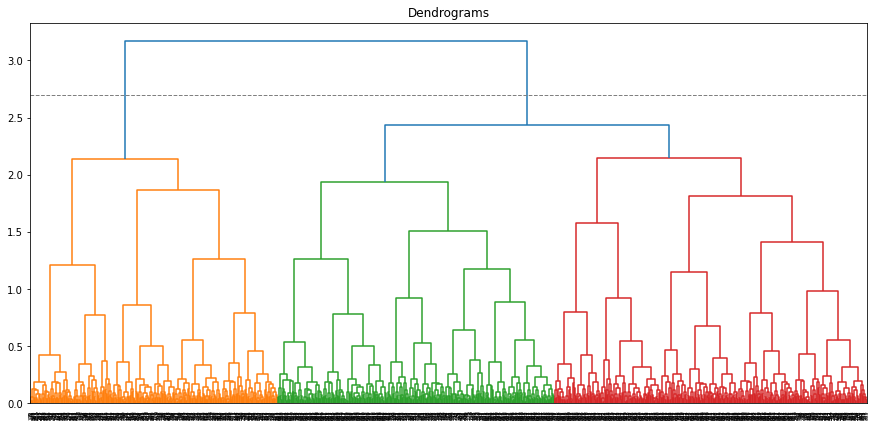

In [ ]:
#creating dendograms for hierarical classification
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_4.iloc[:,:3], method='complete'))
plt.axhline(y=2.7, c='grey', lw=1, linestyle='dashed')

In [ ]:
# Generating Cluster labels through heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster_4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster_4.fit_predict(df_4.iloc[:,:3])


array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
df_4['Predict_label_heirarchical'] = cluster_4.labels_ #saving generated clusters to data frame

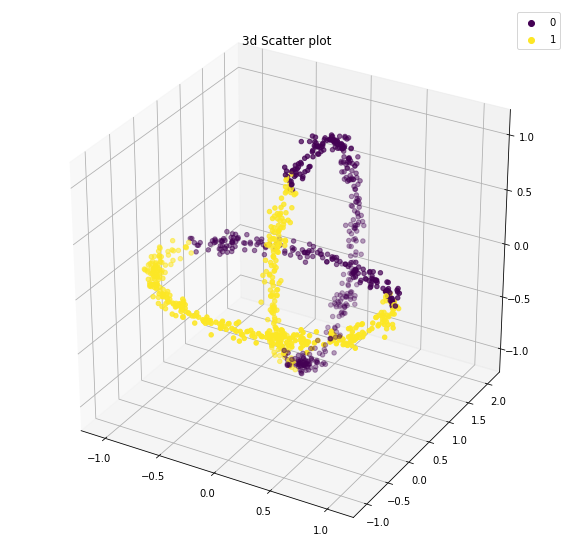

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_4['X1'], df_4['X2'], df_4['X3'],c=df_4['Predict_label_Kmeans'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

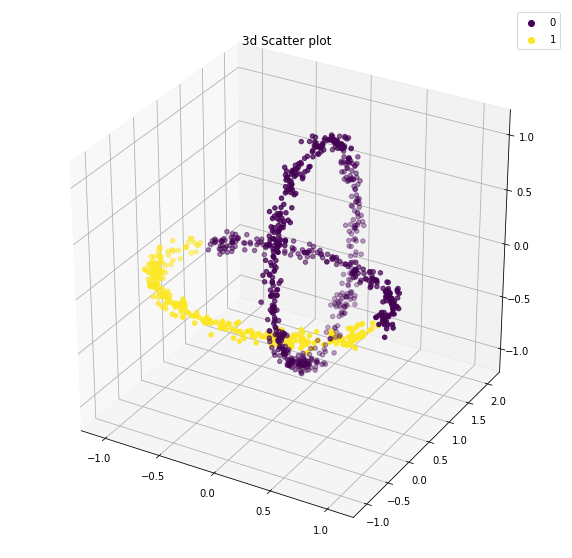

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_4['X1'], df_4['X2'], df_4['X3'],c=df_4['Predict_label_heirarchical'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
print("Accuracy Score for K means is : ",metrics.accuracy_score(df_4['Class'],df_4['Predict_label_Kmeans']))
print("Accuracy Score for Heirarchical clustering is : ",metrics.accuracy_score(df_4['Class'],df_4['Predict_label_heirarchical']))


Accuracy Score for K means is :  0.327
Accuracy Score for Heirarchical clustering is :  0.296


In [ ]:
print("F1 Score for K means is  :",metrics.f1_score(df_4['Class'],df_4['Predict_label_Kmeans'],average='weighted'))
print("F1 Score for heirarchical is  :",metrics.f1_score(df_4['Class'],df_4['Predict_label_heirarchical'],average='weighted'))


F1 Score for K means is  : 0.32667332667332666
F1 Score for heirarchical is  : 0.371859296482412


In [ ]:
## Metrics for  Kmeans Clustering

# Rand Score
print("K_means Rand Score :",metrics.rand_score(df_4['Class'], df_4['Predict_label_Kmeans']))
# Adjusted Rand Score
print("K_means Adj Rand Score :",metrics.adjusted_rand_score(df_4['Class'], df_4['Predict_label_Kmeans']))
#Homogeneity Score
print("K_means homogeneity Score :",metrics.homogeneity_score(df_4['Class'], df_4['Predict_label_Kmeans']))
#Complteness Score 
print("K_menas Completeness Score : ",metrics.completeness_score(df_4['Class'], df_4['Predict_label_Kmeans']))


K_means Rand Score : 0.5463643643643644
K_means Adj Rand Score : 0.09272782327563998
K_means homogeneity Score : 0.06864007182194304
K_menas Completeness Score :  0.06864026987602902


In [ ]:
## Metrics for Heirarchical Clustering


# Rand Score
print("Heirarchical Rand Score :",metrics.rand_score(df_4['Class'], df_4['Predict_label_heirarchical']))
# Adjusted Rand Score
print("Heirarchical Adj Rand Score :",metrics.adjusted_rand_score(df_4['Class'], df_4['Predict_label_heirarchical']))
#Homogeneity Score
print("Heirarchical  homogeneity Score :",metrics.homogeneity_score(df_4['Class'], df_4['Predict_label_heirarchical']))
#Complteness Score 
print("Heirarchical Completeness Score : ",metrics.completeness_score(df_4['Class'], df_4['Predict_label_heirarchical']))



Heirarchical Rand Score : 0.6749069069069069
Heirarchical Adj Rand Score : 0.34992159383948207
Heirarchical  homogeneity Score : 0.3886270525725704
Heirarchical Completeness Score :  0.44346291425663137


### Data 5

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data5.csv to Data5.csv


In [ ]:
df_5 = pd.read_csv('/Data5.csv')

In [ ]:
#df_5=pd.read_csv("./Data/Task1/Data5.csv")


In [ ]:
df_5.head()

Unnamed: 0         X1         X2         X3  Class
0           1  -4.822490 -50.402170   4.020861      1
1           2 -44.460120  20.964670 -11.492060      1
2           3  50.001020   0.780748   9.134460      1
3           4 -41.699080 -22.310060  16.314120      1
4           5   4.425242  -4.666664  50.223740      1

In [ ]:
df_5.drop('Unnamed: 0',axis=1,inplace=True) #to drop index column

In [ ]:
df_5.head()

X1         X2         X3  Class
0  -4.822490 -50.402170   4.020861      1
1 -44.460120  20.964670 -11.492060      1
2  50.001020   0.780748   9.134460      1
3 -41.699080 -22.310060  16.314120      1
4   4.425242  -4.666664  50.223740      1

In [ ]:
df_5['Class'].value_counts().sort_values(ascending=False) #find no. of elements in clusters

1    400
2    400
Name: Class, dtype: int64

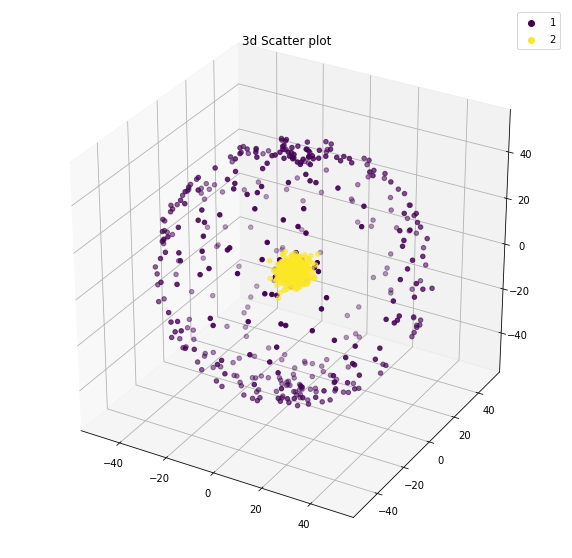

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_5['X1'], df_5['X2'], df_5['X3'],c=df_5['Class'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
# to generate Kmeans clusters
from sklearn.cluster import KMeans
cluster_data_5 = KMeans(n_clusters=2)
cluster_data_5.fit(df_5.iloc[:,0:3])

KMeans(n_clusters=2)

In [ ]:
df_5['Predict_label_Kmeans'] = cluster_data_5.labels_ #to store Kmeans clusters in data frame

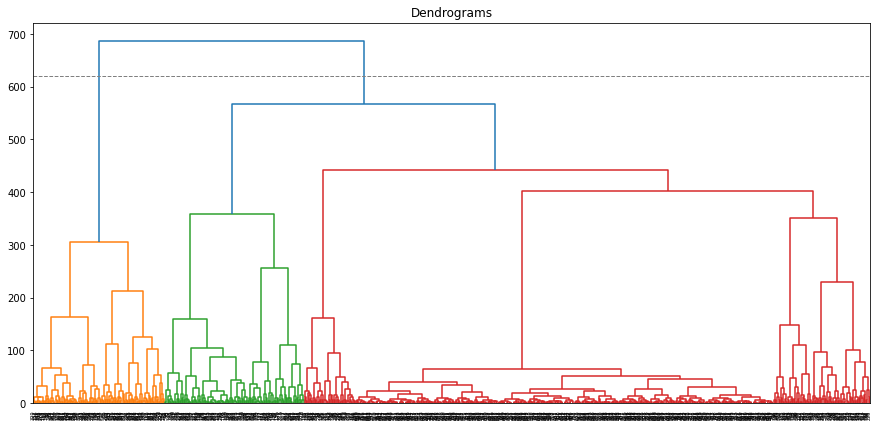

In [ ]:
#creating dendograms for hierarical classification
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_5.iloc[:,:3], method='ward'))
plt.axhline(y=620, c='grey', lw=1, linestyle='dashed')

In [ ]:
# Generating Cluster labels through heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster_5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_5.fit_predict(df_5.iloc[:,:3])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
df_5['Predict_label_heirarchical']=cluster_5.labels_ #to store hierarichal clusters in data frame

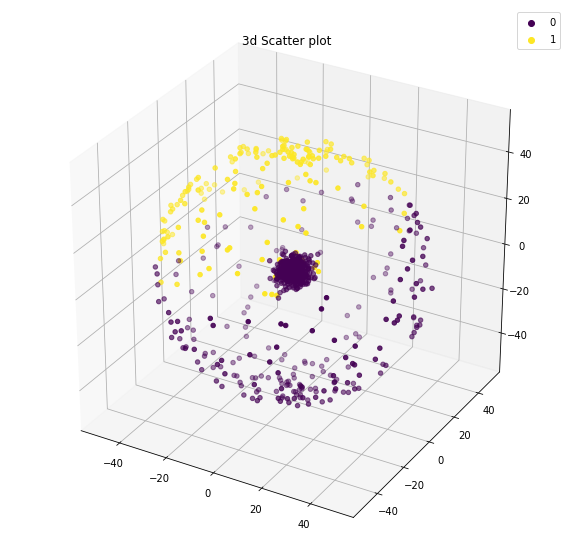

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_5['X1'], df_5['X2'], df_5['X3'],c=df_5['Predict_label_Kmeans'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

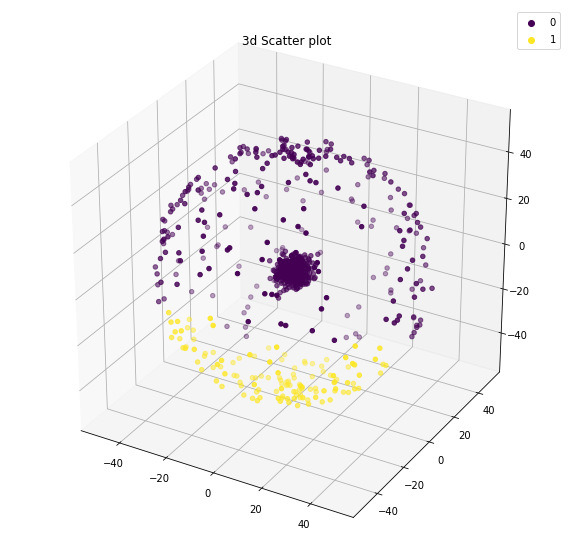

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_5['X1'], df_5['X2'], df_5['X3'],c=df_5['Predict_label_heirarchical'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
print("Accuracy Score for K means is : ",metrics.accuracy_score(df_5['Class'],df_5['Predict_label_Kmeans']))
print("Accuracy Score for Heirarchical clustering is : ",metrics.accuracy_score(df_5['Class'],df_5['Predict_label_heirarchical']))


Accuracy Score for K means is :  0.21375
Accuracy Score for Heirarchical clustering is :  0.1575


In [ ]:
print("F1 Score for K means is  :",metrics.f1_score(df_5['Class'],df_5['Predict_label_Kmeans'],average='weighted'))
print("F1 Score for heirarchical is  :",metrics.f1_score(df_5['Class'],df_5['Predict_label_heirarchical'],average='weighted'))


F1 Score for K means is  : 0.29947460595446584
F1 Score for heirarchical is  : 0.2395437262357415


In [ ]:
## Metrics for  Kmeans Clustering

# Rand Score
print("K_means Rand Score :",metrics.rand_score(df_5['Class'], df_5['Predict_label_Kmeans']))
# Adjusted Rand Score
print("K_means Adj Rand Score :",metrics.adjusted_rand_score(df_5['Class'], df_5['Predict_label_Kmeans']))
#Homogeneity Score
print("K_means homogeneity Score :",metrics.homogeneity_score(df_5['Class'], df_5['Predict_label_Kmeans']))
#Complteness Score 
print("K_menas Completeness Score : ",metrics.completeness_score(df_5['Class'], df_5['Predict_label_Kmeans']))


K_means Rand Score : 0.5908667083854818
K_means Adj Rand Score : 0.18206807775637826
K_means homogeneity Score : 0.25619981157127214
K_menas Completeness Score :  0.3422432358357544


In [ ]:
## Metrics for Heirarchical Clustering


# Rand Score
print("Heirarchical Rand Score :",metrics.rand_score(df_5['Class'], df_5['Predict_label_heirarchical']))
# Adjusted Rand Score
print("Heirarchical Adj Rand Score :",metrics.adjusted_rand_score(df_5['Class'], df_5['Predict_label_heirarchical']))
#Homogeneity Score
print("Heirarchical  homogeneity Score :",metrics.homogeneity_score(df_5['Class'], df_5['Predict_label_heirarchical']))
#Complteness Score 
print("Heirarchical Completeness Score : ",metrics.completeness_score(df_5['Class'], df_5['Predict_label_heirarchical']))



Heirarchical Rand Score : 0.5490488110137672
Heirarchical Adj Rand Score : 0.09862621818643041
Heirarchical  homogeneity Score : 0.17886455515562594
Heirarchical Completeness Score :  0.2846824090289758


### Data 6

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data6.csv to Data6.csv


In [ ]:
df_6 = pd.read_csv('Data6.csv')

In [ ]:
#df_6=pd.read_csv("./Data/Task1/Data6.csv")

In [ ]:
df_6.head()

Unnamed: 0        X1        X2  Class
0           1  1.388261  2.076096      1
1           2  2.177247  3.102304      1
2           3  0.378645  5.307610      1
3           4  3.681732  1.622681      1
4           5  2.462861  2.777897      1

In [ ]:
df_6.drop('Unnamed: 0',axis=1,inplace=True) #drop index column

In [ ]:
df_6['Class'].value_counts().sort_values(ascending=False) #find no. of data points in each classification

1    2048
2    2048
Name: Class, dtype: int64

Text(0.5, 1.0, 'Original Class Plots')

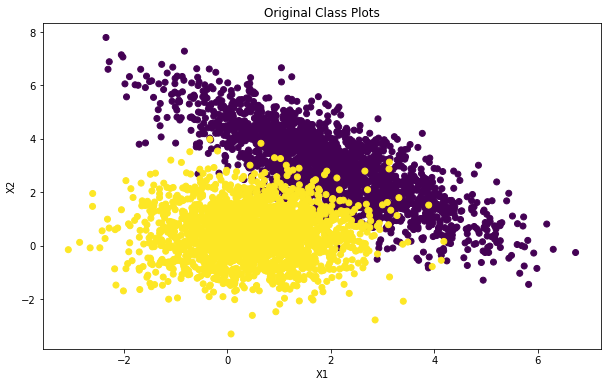

In [ ]:
#to plot scatter plot from data frame
plt.figure(figsize=(10,6))
plt.scatter(df_6['X1'],df_6['X2'],c=df_6['Class'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Class Plots')

In [ ]:
#to create Kmeans clusters
from sklearn.cluster import KMeans
cluster_data_6 = KMeans(n_clusters=2)
cluster_data_6.fit(df_6.iloc[:,0:2])

KMeans(n_clusters=2)

In [ ]:
df_6['Predict_label_Kmeans']=cluster_data_6.labels_ # to save generated labels in data frame
#df_6['Predict_label_Kmeans']=df_6['Predict_label_Kmeans'].astype(str)

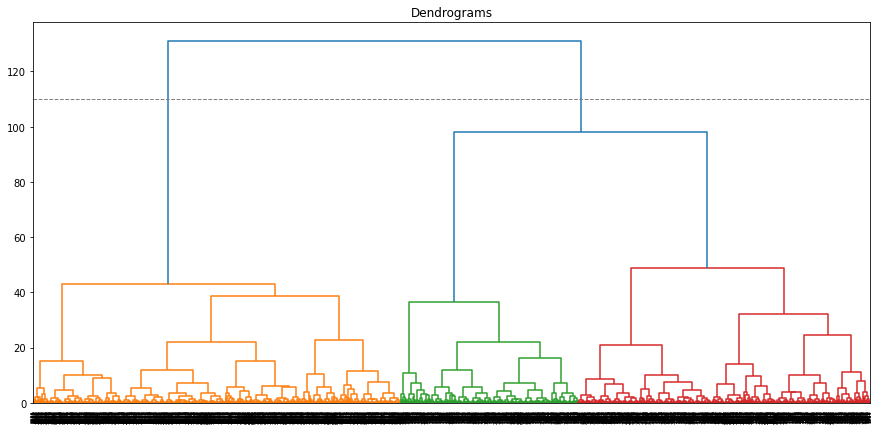

In [ ]:
#creating dendograms for hierarical classification
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_6.iloc[:,:2], method='ward'))
plt.axhline(y=110, c='grey', lw=1, linestyle='dashed')

In [ ]:
# Generating Cluster labels through heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster_6 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster_6.fit_predict(df_6.iloc[:,:2])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_6['Predict_label_heirarchical']=cluster_6.labels_ #to save generated clusters to data frame

Text(0.5, 1.0, 'Kmeans Class Plots')

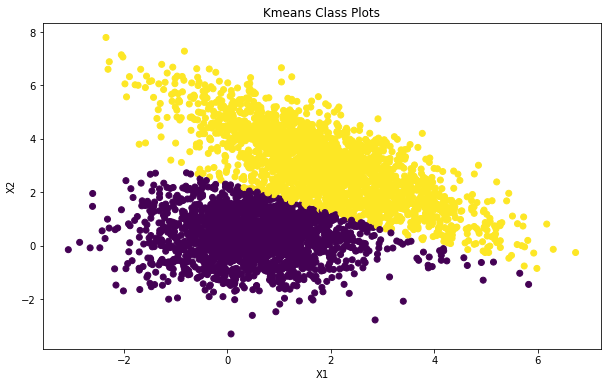

In [ ]:
#to plot Kmeans clusters
plt.figure(figsize=(10,6))
plt.scatter(df_6['X1'],df_6['X2'],c=df_6['Predict_label_Kmeans'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Kmeans Class Plots')

Text(0.5, 1.0, 'heirarchical Class Plots')

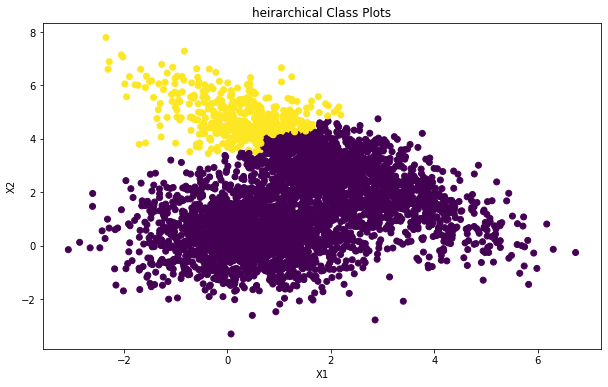

In [ ]:
#to plot hierarichal clusters
plt.figure(figsize=(10,6))
plt.scatter(df_6['X1'],df_6['X2'],c=df_6['Predict_label_heirarchical'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('heirarchical Class Plots')

In [ ]:
print("Accuracy Score for K means is : ",metrics.accuracy_score(df_6['Class'],df_6['Predict_label_Kmeans']))
print("Accuracy Score for Heirarchical clustering is : ",metrics.accuracy_score(df_6['Class'],df_6['Predict_label_heirarchical']))

Accuracy Score for K means is :  0.48876953125
Accuracy Score for Heirarchical clustering is :  0.101806640625


In [ ]:
print("F1 Score for K means is  :",metrics.f1_score(df_6['Class'],df_6['Predict_label_Kmeans'],average='weighted'))
print("F1 Score for heirarchical is  :",metrics.f1_score(df_6['Class'],df_6['Predict_label_heirarchical'],average='weighted'))


F1 Score for K means is  : 0.476326433499881
F1 Score for heirarchical is  : 0.16889428918590524


In [ ]:
## Metrics for  Kmeans Clustering

# Rand Score
print("K_means Rand Score :",metrics.rand_score(df_6['Class'], df_6['Predict_label_Kmeans']))
# Adjusted Rand Score
print("K_means Adj Rand Score :",metrics.adjusted_rand_score(df_6['Class'], df_6['Predict_label_Kmeans']))
#Homogeneity Score
print("K_means homogeneity Score :",metrics.homogeneity_score(df_6['Class'], df_6['Predict_label_Kmeans']))
#Complteness Score 
print("K_menas Completeness Score : ",metrics.completeness_score(df_6['Class'], df_6['Predict_label_Kmeans']))

K_means Rand Score : 0.907530262706044
K_means Adj Rand Score : 0.815060637690859
K_means homogeneity Score : 0.728883907411995
K_menas Completeness Score :  0.7303225889736872


In [ ]:
## Metrics for Heirarchical Clustering


# Rand Score
print("Heirarchical Rand Score :",metrics.rand_score(df_6['Class'], df_6['Predict_label_heirarchical']))
# Adjusted Rand Score
print("Heirarchical Adj Rand Score :",metrics.adjusted_rand_score(df_6['Class'], df_6['Predict_label_heirarchical']))
#Homogeneity Score
print("Heirarchical  homogeneity Score :",metrics.homogeneity_score(df_6['Class'], df_6['Predict_label_heirarchical']))
#Complteness Score 
print("Heirarchical Completeness Score : ",metrics.completeness_score(df_6['Class'], df_6['Predict_label_heirarchical']))


Heirarchical Rand Score : 0.5202162746108059
Heirarchical Adj Rand Score : 0.04058039464776415
Heirarchical  homogeneity Score : 0.10301196048908724
Heirarchical Completeness Score :  0.21561600523087335


### Data 7

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data7.csv to Data7.csv


In [ ]:
df_7 = pd.read_csv('/Data7.csv')

In [ ]:
#df_7=pd.read_csv("./Data/Task1/Data7.csv")

In [ ]:
df_7.head()

Unnamed: 0        X1        X2  Class
0           1 -3.000000 -3.000000      5
1           2 -3.000000  3.000000      4
2           3  3.000000 -3.000000      6
3           4  3.000000  3.000000      3
4           5 -0.417091  0.114782      1

In [ ]:
df_7.drop('Unnamed: 0',axis=1,inplace=True) #to drop index column

In [ ]:
df_7['Class'].value_counts().sort_values(ascending=False) #to find no. of data points in each clusters

1    395
2    363
5      3
4      3
6      3
3      3
Name: Class, dtype: int64

Text(0.5, 1.0, 'Original Class Plots')

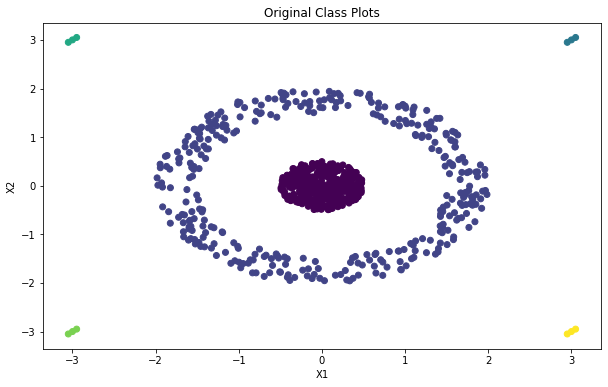

In [ ]:
#to plot a scatter plot for data frame
plt.figure(figsize=(10,6))
plt.scatter(df_7['X1'],df_7['X2'],c=df_7['Class'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Class Plots')

In [ ]:
#to generate KMeans clusters
from sklearn.cluster import KMeans
cluster_data_7= KMeans(n_clusters=6)
cluster_data_7.fit(df_7.iloc[:,0:2])

KMeans(n_clusters=6)

In [ ]:
df_7['Predict_label_Kmeans']=cluster_data_7.labels_ #to save clusters to data frame


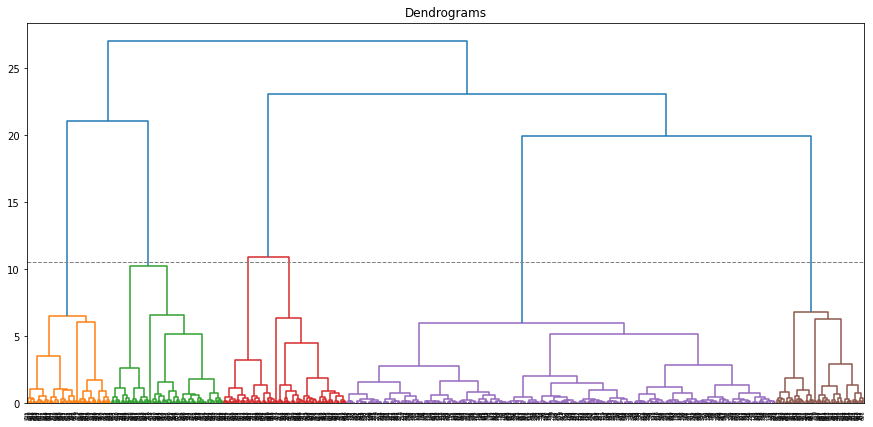

In [ ]:
#creating dendograms for hierarical classification
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_7.iloc[:,:2], method='ward'))
plt.axhline(y=10.5, c='grey', lw=1, linestyle='dashed')

In [ ]:
# Generating Cluster labels through heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster_7 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')  
cluster_7.fit_predict(df_7.iloc[:,:2])

array([4, 5, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df_7['Predict_label_heirarchical']=cluster_7.labels_ #to save generated clusters to data frame

Text(0.5, 1.0, 'Kmeans Class Plots')

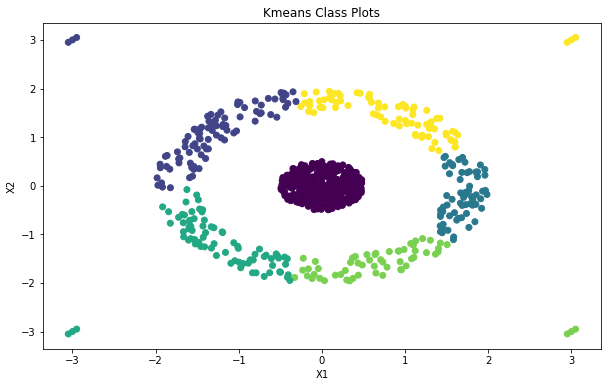

In [ ]:
#To plot KMeans clusters
plt.figure(figsize=(10,6))
plt.scatter(df_7['X1'],df_7['X2'],c=df_7['Predict_label_Kmeans'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Kmeans Class Plots')

Text(0.5, 1.0, 'heirarchical Class Plots')

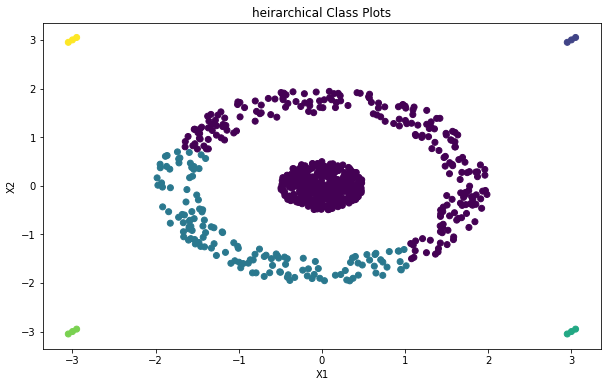

In [ ]:
#to plot hierarichal cluters
plt.figure(figsize=(10,6))
plt.scatter(df_7['X1'],df_7['X2'],c=df_7['Predict_label_heirarchical'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('heirarchical Class Plots')

In [ ]:
print("Accuracy Score for K means is : ",metrics.accuracy_score(df_7['Class'],df_7['Predict_label_Kmeans']))
print("Accuracy Score for Heirarchical clustering is : ",metrics.accuracy_score(df_7['Class'],df_7['Predict_label_heirarchical']))

Accuracy Score for K means is :  0.08831168831168831
Accuracy Score for Heirarchical clustering is :  0.18441558441558442


In [ ]:
print("F1 Score for K means is  :",metrics.f1_score(df_7['Class'],df_7['Predict_label_Kmeans'],average='weighted'))
print("F1 Score for heirarchical is  :",metrics.f1_score(df_7['Class'],df_7['Predict_label_heirarchical'],average='weighted'))


F1 Score for K means is  : 0.1487570434206165
F1 Score for heirarchical is  : 0.26512022630834514


In [ ]:
## Metrics for  Kmeans Clustering

# Rand Score
print("K_means Rand Score :",metrics.rand_score(df_7['Class'], df_7['Predict_label_Kmeans']))
# Adjusted Rand Score
print("K_means Adj Rand Score :",metrics.adjusted_rand_score(df_7['Class'], df_7['Predict_label_Kmeans']))
#Homogeneity Score
print("K_means homogeneity Score :",metrics.homogeneity_score(df_7['Class'], df_7['Predict_label_Kmeans']))
#Complteness Score 
print("K_menas Completeness Score : ",metrics.completeness_score(df_7['Class'], df_7['Predict_label_Kmeans']))

K_means Rand Score : 0.8199820985256616
K_means Adj Rand Score : 0.6357711409365294
K_means homogeneity Score : 0.9162763320827376
K_menas Completeness Score :  0.48792562611752244


In [ ]:
## Metrics for Heirarchical Clustering


# Rand Score
print("Heirarchical Rand Score :",metrics.rand_score(df_7['Class'], df_7['Predict_label_heirarchical']))
# Adjusted Rand Score
print("Heirarchical Adj Rand Score :",metrics.adjusted_rand_score(df_7['Class'], df_7['Predict_label_heirarchical']))
#Homogeneity Score
print("Heirarchical  homogeneity Score :",metrics.homogeneity_score(df_7['Class'], df_7['Predict_label_heirarchical']))
#Complteness Score 
print("Heirarchical Completeness Score : ",metrics.completeness_score(df_7['Class'], df_7['Predict_label_heirarchical']))


Heirarchical Rand Score : 0.5991522131964264
Heirarchical Adj Rand Score : 0.206684299672276
Heirarchical  homogeneity Score : 0.3334546842001094
Heirarchical Completeness Score :  0.4529330732936657


### Data 8

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data8.csv to Data8.csv


In [ ]:
df_8 = pd.read_csv('/Data8.csv')

In [ ]:
#df_8=pd.read_csv("./Data/Task1/Data8.csv")

In [ ]:
df_8.drop('Unnamed: 0',axis=1,inplace=True) #to drop index column

In [ ]:
df_8.head()

X1        X2       X3  Class
0  0.000000  0.000000  1.00000      1
1  0.000000  0.052336  0.99863      1
2  0.049774  0.016173  0.99863      1
3  0.030762 -0.042341  0.99863      1
4 -0.030762 -0.042341  0.99863      1

In [ ]:
df_8['Class'].value_counts().sort_values(ascending=False) #to find number of data points in each clusters

1    4002
Name: Class, dtype: int64

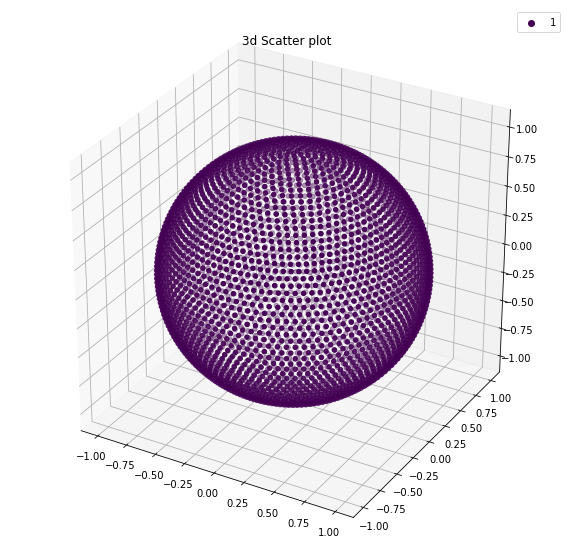

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_8['X1'], df_8['X2'], df_8['X3'],c=df_8['Class'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
#to generate kMeans Clusters
from sklearn.cluster import KMeans
cluster_data_8 = KMeans(n_clusters=1)
cluster_data_8.fit(df_8.iloc[:,0:3])


KMeans(n_clusters=1)

In [ ]:
df_8['Predict_label_Kmeans'] = cluster_data_8.labels_ #to save clusters in data frame

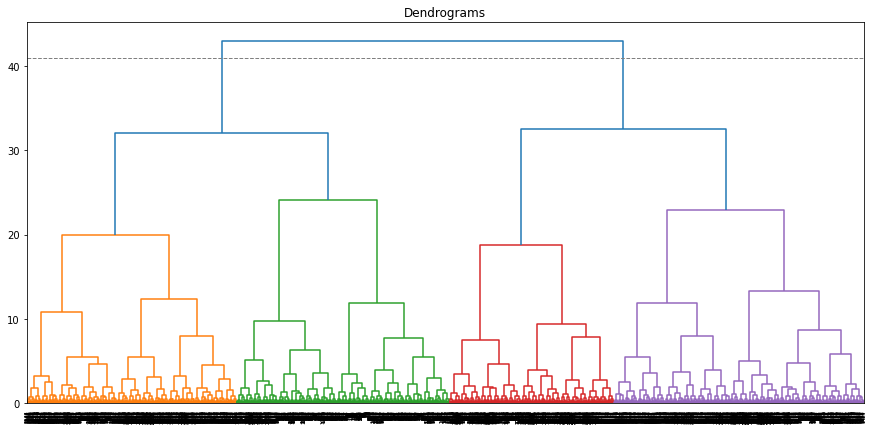

In [ ]:
#creating dendograms for hierarical classification
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 7))
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_8.iloc[:,:3], method='ward'))
plt.axhline(y=41, c='grey', lw=1, linestyle='dashed')


In [ ]:
# Generating Cluster labels through heirarchical clustering
from sklearn.cluster import AgglomerativeClustering
cluster_8 = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='complete')  
cluster_8.fit_predict(df_8.iloc[:,:3])

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_8['Predict_label_heirarchical']=cluster_8.labels_ #to save generated clusters in data frame

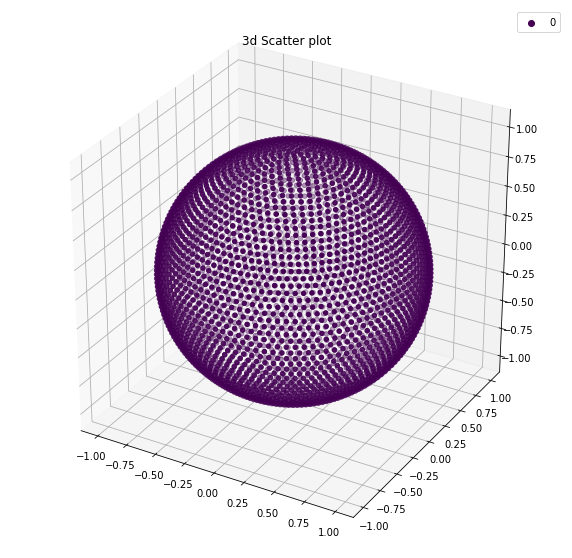

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_8['X1'], df_8['X2'], df_8['X3'],c=df_8['Predict_label_Kmeans'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

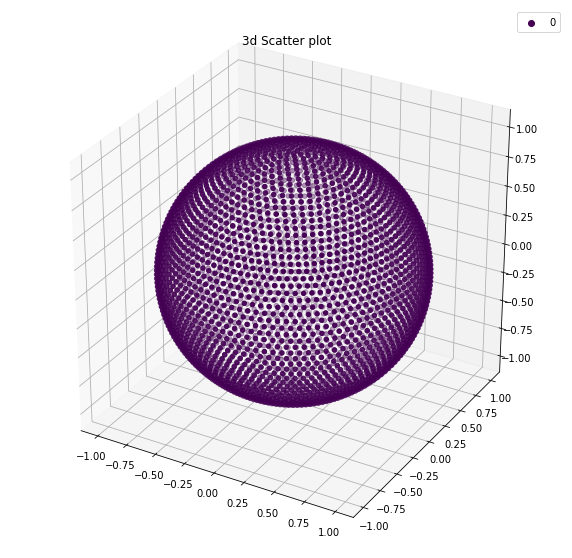

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
sc=ax.scatter(df_8['X1'], df_8['X2'], df_8['X3'],c=df_8['Predict_label_heirarchical'])
ax.set_title('3d Scatter plot')
plt.legend(*sc.legend_elements())
plt.show()

In [ ]:
print("Accuracy Score for K means is : ",metrics.accuracy_score(df_8['Class'],df_8['Predict_label_Kmeans']))
print("Accuracy Score for Heirarchical clustering is : ",metrics.accuracy_score(df_8['Class'],df_8['Predict_label_heirarchical']))

Accuracy Score for K means is :  0.0
Accuracy Score for Heirarchical clustering is :  0.0


In [ ]:
print("F1 Score for K means is  :",metrics.f1_score(df_8['Class'],df_8['Predict_label_Kmeans'],average='weighted'))
print("F1 Score for heirarchical is  :",metrics.f1_score(df_8['Class'],df_8['Predict_label_heirarchical'],average='weighted'))

F1 Score for K means is  : 0.0
F1 Score for heirarchical is  : 0.0


In [ ]:
## Metrics for  Kmeans Clustering

# Rand Score
print("K_means Rand Score :",metrics.rand_score(df_8['Class'], df_8['Predict_label_Kmeans']))
# Adjusted Rand Score
print("K_means Adj Rand Score :",metrics.adjusted_rand_score(df_8['Class'], df_8['Predict_label_Kmeans']))
#Homogeneity Score
print("K_means homogeneity Score :",metrics.homogeneity_score(df_8['Class'], df_8['Predict_label_Kmeans']))
#Complteness Score 
print("K_menas Completeness Score : ",metrics.completeness_score(df_8['Class'], df_8['Predict_label_Kmeans']))


K_means Rand Score : 1.0
K_means Adj Rand Score : 1.0
K_means homogeneity Score : 1.0
K_menas Completeness Score :  1.0


In [ ]:
## Metrics for Heirarchical Clustering


# Rand Score
print("Heirarchical Rand Score :",metrics.rand_score(df_8['Class'], df_8['Predict_label_heirarchical']))
# Adjusted Rand Score
print("Heirarchical Adj Rand Score :",metrics.adjusted_rand_score(df_8['Class'], df_8['Predict_label_heirarchical']))
#Homogeneity Score
print("Heirarchical  homogeneity Score :",metrics.homogeneity_score(df_8['Class'], df_8['Predict_label_heirarchical']))
#Complteness Score 
print("Heirarchical Completeness Score : ",metrics.completeness_score(df_8['Class'], df_8['Predict_label_heirarchical']))


Heirarchical Rand Score : 1.0
Heirarchical Adj Rand Score : 1.0
Heirarchical  homogeneity Score : 1.0
Heirarchical Completeness Score :  1.0


In [ ]:
!jupyter nbconvert -- to html Group_53_Project_1_Task_1.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
[NbConvertApp] Converting notebook Group_53_Project_1_Task_1.ipynb to html
[NbConvertApp] Writing 2420039 bytes to Group_53_Project_1_Task_1.html
